# Welcome to Pandas Snippets

### import statements

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as plt
%matplotlib inline 

### Print Versions

In [3]:
print('tensorflow version ',tf.__version__)
print('pandas version ',pd.__version__)
print('numpy version ', np.__version__)
print('matplotlib version ', plt.__version__)

tensorflow version  1.12.0
pandas version  0.23.4
numpy version  1.15.4
matplotlib version  3.0.2


# List of Topics Memorized
1. [Creating a basic dataframe]
2. [Loading/saving from csv, html]
3. [.concatentate and appending]
4. [ .merge]
5. [ pickling]
6. [ statistics, correlatation tables]
7. [ resampling, missing data, rolling statistics, ]
8. [ .loc,selecting columns, limit rows, ]
9. [ comparison operators, filtering, sorting]
10. [] 
11. [] 
12. []

# Basics
Here we create a basic pandas table/dataframe with 3 rows. Each column's data types are printed. The way the dataframe created here is by providing the column name as the key and its values in list form. Each key in the object corresponds to a different column  

In [5]:
df = pd.DataFrame({'y': [1, 2, 3],
                       'score': [93.5, 89.4, 90.3],
                       'name': ['Dirac', 'Pauli', 'Bohr'],
                       'birthday': ['1902-08-08', '1900-04-25', '1885-10-07']})
print(type(df))
print(df.dtypes)
df

<class 'pandas.core.frame.DataFrame'>
birthday     object
name         object
score       float64
y             int64
dtype: object


,birthday,name,score,y
0,1902-08-08,Dirac,93.5,1
1,1900-04-25,Pauli,89.4,2
2,1885-10-07,Bohr,90.3,3


### Loading from CSV
Sparse values are replaced with NaN

In [29]:
csvdf = pd.read_csv(filepath_or_buffer='BlackFriday.csv')
csvdf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


### Gathering tables from HTML
### and setting columns

In [47]:
fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
columns = fiddy_states[0][:1]
print(type(columns),  columns.values, columns.values.tolist())
columns = columns.values.tolist()

fiddy_states = fiddy_states[0][1:]
fiddy_states.columns = columns[0]
fiddy_states.set_index('Sl no.', inplace=True)

<class 'pandas.core.frame.DataFrame'> [['Sl no.' 'Abbreviations' 'State Name' 'Capital' 'Became a State']] [['Sl no.', 'Abbreviations', 'State Name', 'Capital', 'Became a State']]


### Pickling 
saving and loading using regular pickle

In [49]:
import pickle

with open('fiddy_states.pickle', 'wb') as pickler:
    pickle.dump(fiddy_states, pickler)

with open('fiddy_states.pickle', 'rb') as picklereader:
    pickledDF = pickle.load(picklereader)


saving and loading using pandas built in pickling function

In [53]:
fiddy_states.to_pickle('fiddy_states_fromPD.pickle')
fiddy_statesPickled1 = pd.read_pickle('fiddy_states_fromPD.pickle')
fiddy_statesPickled1

,Abbreviations,State Name,Capital,Became a State
Sl no.,,,,
1,AL,Alabama,Montgomery,"December 14, 1819"
2,AK,Alaska,Juneau,"January 3, 1959"
3,AZ,Arizona,Phoenix,"February 14, 1912"
4,AR,Arkansas,Little Rock,"June 15, 1836"
5,CA,California,Sacramento,"September 9, 1850"
6,CO,Colorado,Denver,"August 1, 1876"
7,CT,Connecticut,Hartford,"January 9, 1788"
8,DE,Delaware,Dover,"December 7, 1787"
9,FL,Florida,Tallahassee,"March 3, 1845"


### Creating a series and concatenating two series on different axis to make a df


In [30]:
items = pd.Series(data=[93.5, 89.4, 90.3], name='score')
print(type(items))
items

items2 = pd.Series(data=['1902-08-08', '1900-04-25'], name='birthday')

print('merged items along index axes:')
print(pd.concat(objs=[items, items2], axis=0))
print('')
print('merged items along column axes:')
print(pd.concat(objs=[items, items2], axis=1))

print 'two concatenated series make ', type(pd.concat(objs=[items, items2], axis=1))


<class 'pandas.core.series.Series'>
merged items along index axes:
0          93.5
1          89.4
2          90.3
0    1902-08-08
1    1900-04-25
dtype: object

merged items along column axes:
   score    birthday
0   93.5  1902-08-08
1   89.4  1900-04-25
2   90.3         NaN
two concatenated series make  <class 'pandas.core.frame.DataFrame'>


### DateTime Basics

In [31]:
items2 = pd.Series(data=['1902-08-08', '1900-04-25'], name='birthday')
pd.to_datetime(arg=items2, format='%Y-%m-%d')

0   1902-08-08
1   1900-04-25
Name: birthday, dtype: datetime64[ns]

# Merge two dataframes 

In [6]:
df_new = pd.DataFrame(data=list(zip(['Dirac', 'Pauli', 'Bohr', 'Einstein'],
                                    [True, False, True, True])),
                      columns=['name', 'friendly'])

df_merge = pd.merge(left=df, right=df_new, on='name', how='outer')
df_merge

,birthday,name,score,y,friendly
0,1902-08-08,Dirac,93.5,1.0,True
1,1900-04-25,Pauli,89.4,2.0,False
2,1885-10-07,Bohr,90.3,3.0,True
3,NaN,Einstein,NaN,NaN,True


# statistics, correlatation tables

In [63]:
mathTable = [np.random.random(5) for i in range(4)]
mathDF = pd.DataFrame(mathTable)
mathDF

,0,1,2,3,4
0,0.972457,0.708637,0.615885,0.489483,0.774488
1,0.107807,0.110913,0.515747,0.896217,0.585764
2,0.619348,0.136159,0.860557,0.291684,0.286260
3,0.545884,0.208609,0.477825,0.745417,0.014817


In [64]:
mathDF.corr()

,0,1,2,3,4
0,1.000000,0.819368,0.336592,-0.699285,0.193962
1,0.819368,1.000000,-0.058315,-0.281345,0.610553
2,0.336592,-0.058315,1.000000,-0.903300,0.038507
3,-0.699285,-0.281345,-0.903300,1.000000,-0.028449
4,0.193962,0.610553,0.038507,-0.028449,1.000000


In [60]:
mathDF.describe()

,0,1,2,3,4
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.531247,0.367844,0.264279,0.603039,0.293226
std,0.201605,0.212378,0.423910,0.422897,0.113718
min,0.235691,0.176112,0.030589,0.180921,0.230079
25%,0.502630,0.203348,0.051643,0.269357,0.230287
50%,0.599981,0.334880,0.063417,0.616581,0.239777
75%,0.628598,0.499376,0.276054,0.950263,0.302717
max,0.689336,0.625505,0.899693,0.998070,0.463274


In [62]:
mathDF['hello'] = mathDF[0]*7/mathDF[1]
mathDF

,0,1,2,3,4,hello
0,0.608352,0.457333,0.068175,0.298835,0.230356,9.311503
1,0.591610,0.212426,0.058660,0.934327,0.230079,19.495102
2,0.689336,0.176112,0.030589,0.180921,0.463274,27.399273
3,0.235691,0.625505,0.899693,0.998070,0.249197,2.637610


# resampling, missing data, rolling statistics

In [180]:
from datetime import datetime, timedelta

a = [[datetime.now().replace(microsecond=0,second=0,minute=0)+timedelta(hours=i)][0] for i in range(100000)]
aString = [a[i].strftime("%Y-%m-%d %H:%M:%S") for i in range(len(a))]
y = np.random.random(len(a))
# len(a)== len(y)
# y
samplingData = pd.DataFrame({'datetime': pd.to_datetime(a), 'dateString': aString , 'random': y})
samplingData.set_index('datetime', inplace=True)
samplingData.dtypes


dateString     object
random        float64
dtype: object

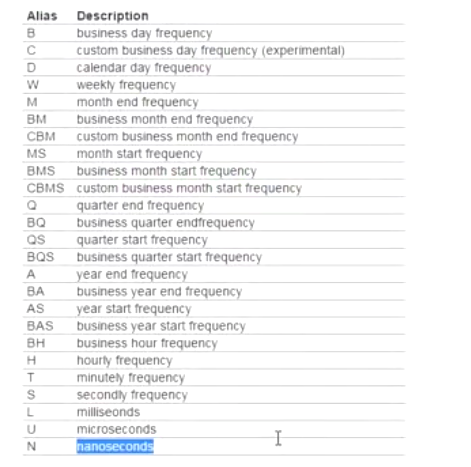

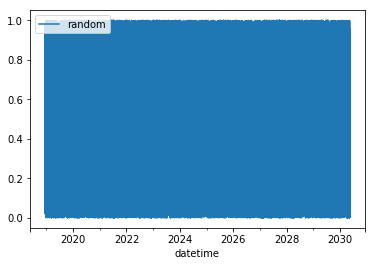

In [181]:
samplingData[['dateString','random']].plot()

In [193]:
samplingData['random1yr'] = samplingData['random'].resample('a', how='mean')
samplingData['random1m'] = samplingData['random'].resample('m', how='mean')
samplingData['random'] = samplingData['random']/8

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


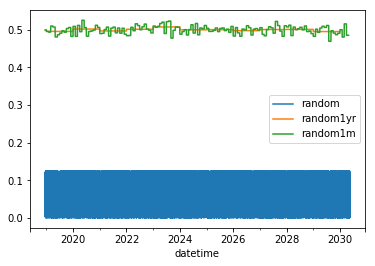

In [194]:
droppedNA = samplingData.dropna()

droppedNA
samplingData.fillna(method='bfill',inplace=True)
samplingData.plot()

## Rolling Statistics
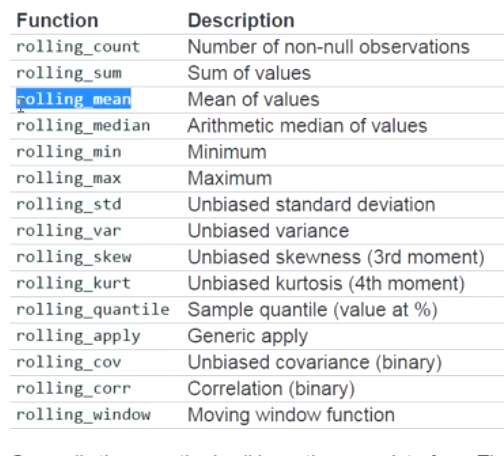